In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
basename,Returns the final component of a pathname
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on
re,Support for regular expressions (RE)
time,This module provides various functions to manipulate time values
inspect,Get useful information from live Python objects


In [2]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

TESTSETNAME = 'allset_test.hdf'

In [3]:
eval_df = read_summary_eval_df()
eval_df = eval_df[eval_df.relative_filepath.str.endswith(os.sep + TESTSETNAME)]
printhtml('<h3>Loaded evaluations performed on testset "%s"</h3>' % TESTSETNAME)
display(eval_df)

Loaded evaluations performed on testset "allset_test.hdf"

,clf,feats,n_estimators,max_samples,random_state,roc_auc_score,average_precision_score,log_loss,best_th_roc_curve,best_th_pr_curve,behaviour,contamination,relative_filepath,tr_set
0,IsolationForest,psd@0.2sec,50,1024,11,0.837592,0.889191,0.532613,0.545314,0.545314,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=11/allset_test.hdf,allset_train.hdf
1,IsolationForest,psd@0.2sec,100,1024,11,0.838669,0.888227,0.532629,0.561714,0.561714,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/allset_test.hdf,allset_train.hdf
2,IsolationForest,psd@0.2sec,100,16384,11,0.823751,0.882817,0.507172,0.521367,0.581444,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=100&random_state=11/allset_test.hdf,allset_train.hdf
3,IsolationForest,psd@0.2sec,200,1024,11,0.824593,0.883358,0.531331,0.561057,0.569378,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=11/allset_test.hdf,allset_train.hdf
4,IsolationForest,psd@0.2sec,50,1024,42,0.808376,0.876038,0.534185,0.567641,0.581245,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/allset_test.hdf,allset_train.hdf
5,IsolationForest,psd@0.2sec,100,1024,42,0.807768,0.877354,0.530856,0.566649,0.566649,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/allset_test.hdf,allset_train.hdf
6,IsolationForest,psd@0.2sec,200,1024,42,0.816471,0.879792,0.533697,0.562555,0.565164,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=42/allset_test.hdf,allset_train.hdf
7,IsolationForest,psd@0.2sec,100,16384,42,0.825540,0.883054,0.501565,0.528595,0.528595,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=100&random_state=42/allset_test.hdf,allset_train.hdf
8,IsolationForest,psd@0.2sec,50,16384,11,0.827835,0.885300,0.503003,0.523122,0.525335,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=50&random_state=11/allset_test.hdf,allset_train.hdf
9,IsolationForest,psd@0.2sec,50,16384,42,0.824048,0.881653,0.507007,0.534032,0.590789,new,auto,clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=50&random_state=42/allset_test.hdf,allset_train.hdf


In [4]:
mean = 'median'
for metric, _eval_df in rank_eval(eval_df,
                                  # evalmetrics=['roc_auc_score', 'average_precision_score', 'f1_max'],
                                  evalmetrics=['average_precision_score', 'roc_auc_score'],
                                  columns=['clf', 'feats', 'n_estimators', 'max_samples'],
                                  mean=mean).items():
    printhtml("<h3>Ranking models according to %s (for each group, showing %s on 'random_state')</h3>" % (metric, mean))
    display(_eval_df)

Ranking models according to average_precision_score (for each group, showing median on 'random_state')

,clf,feats,n_estimators,max_samples,average_precision_score
287,IsolationForest,"psd@0.2sec,psd@5sec",200,16384,0.996913
281,IsolationForest,"psd@0.2sec,psd@5sec",100,16384,0.996849
280,IsolationForest,"psd@0.2sec,psd@5sec",100,8192,0.996762
286,IsolationForest,"psd@0.2sec,psd@5sec",200,8192,0.996742
275,IsolationForest,"psd@0.2sec,psd@5sec",50,16384,0.996597
274,IsolationForest,"psd@0.2sec,psd@5sec",50,8192,0.996584
269,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,16384,0.996524
285,IsolationForest,"psd@0.2sec,psd@5sec",200,4096,0.996502
278,IsolationForest,"psd@0.2sec,psd@5sec",100,2048,0.996482
161,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@5sec",200,16384,0.996472


Ranking models according to roc_auc_score (for each group, showing median on 'random_state')

,clf,feats,n_estimators,max_samples,roc_auc_score
263,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",100,16384,0.997044
257,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,16384,0.996980
221,IsolationForest,"psd@0.2sec,psd@1sec,psd@5sec",50,16384,0.996670
281,IsolationForest,"psd@0.2sec,psd@5sec",100,16384,0.996610
148,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@5sec",50,8192,0.996543
280,IsolationForest,"psd@0.2sec,psd@5sec",100,8192,0.996510
227,IsolationForest,"psd@0.2sec,psd@1sec,psd@5sec",100,16384,0.996508
274,IsolationForest,"psd@0.2sec,psd@5sec",50,8192,0.996456
269,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",200,16384,0.996450
255,IsolationForest,"psd@0.2sec,psd@2sec,psd@5sec",50,4096,0.996449


Evaluation metrics (all classifiers) by number of features

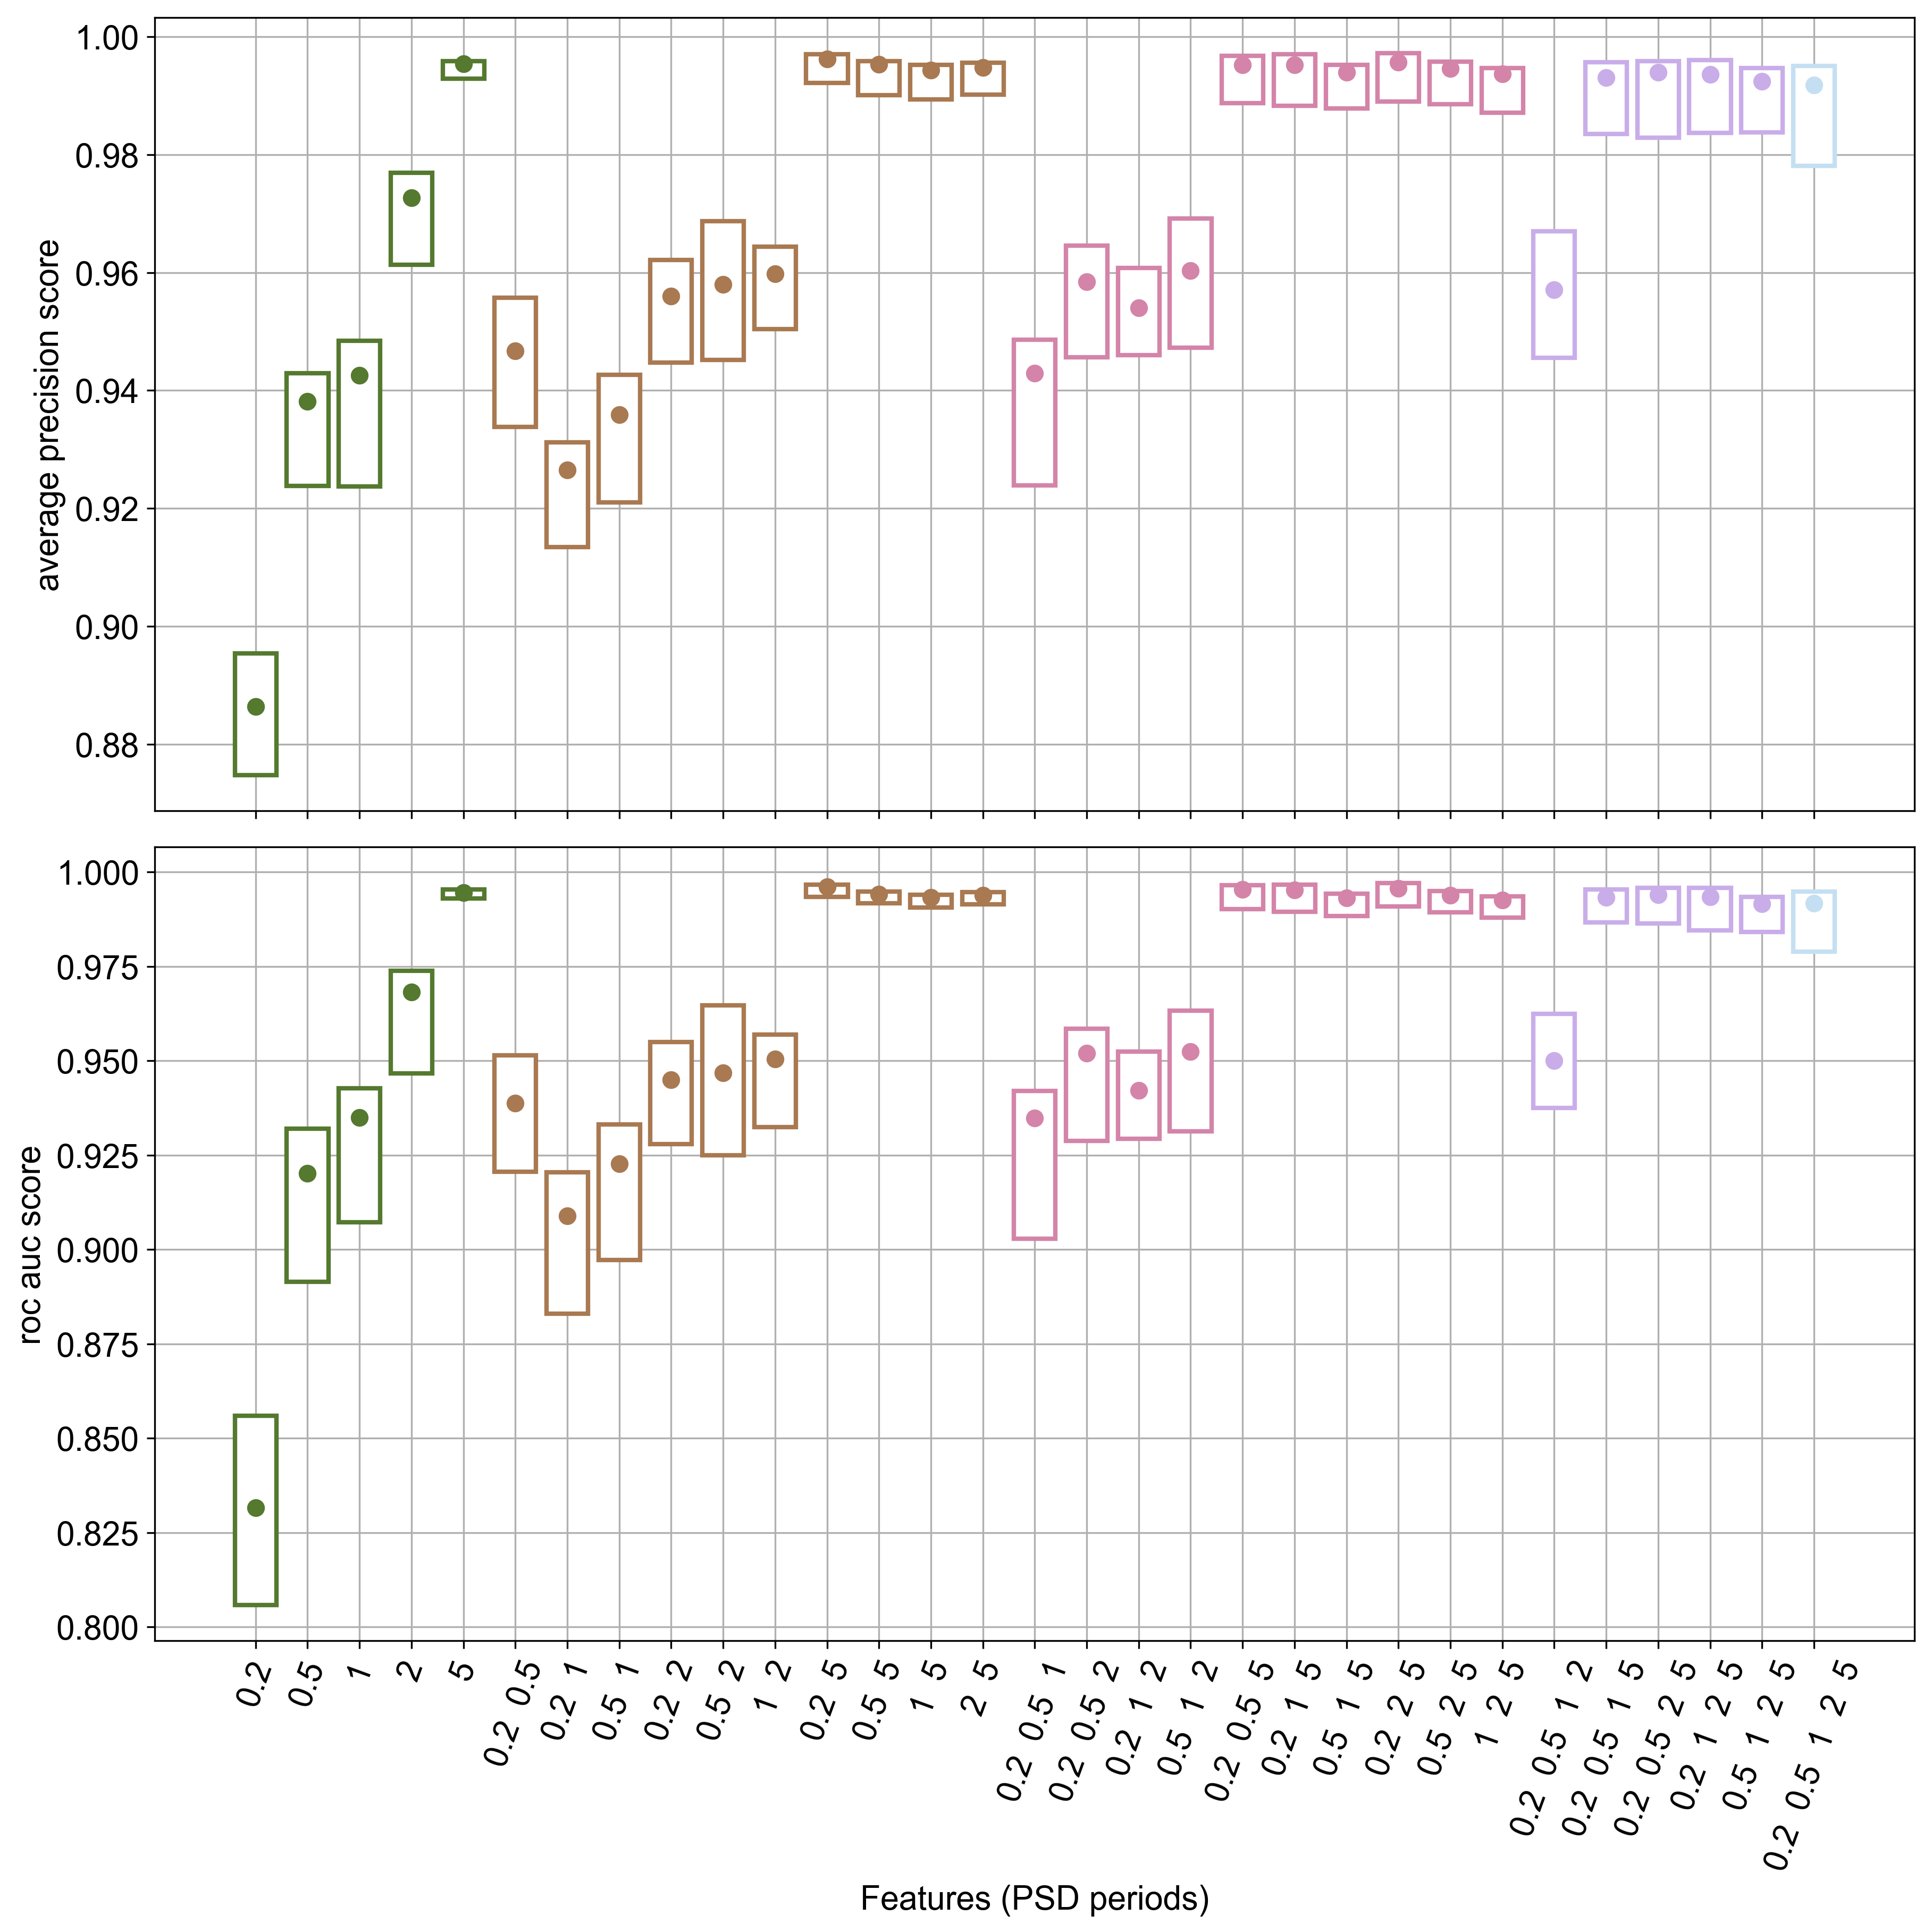

In [5]:
printhtml('<h3>Evaluation metrics (all classifiers) by number of features</h3>')
plot_feats_vs_evalmetrics(eval_df)

In [6]:
# plot and dataframe settings to be applyed from now on:
plt.rcParams['figure.figsize'] = (12, 6)
decimals = 4
n_estimators = np.unique(eval_df.n_estimators.values)
max_samples = np.unique(eval_df.max_samples.values)

# filtering:
printhtml('<h3>Analyzing Hyperparameters keeping only evaluations using at least the feature "psd@5sec"</h3>')
eval_df = eval_df[eval_df.feats.str.contains('psd@5sec')]

Analyzing Hyperparameters keeping only evaluations using at least the feature psd@5sec

Score used: average_precision_score

Min average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9781  0.9855  0.9875  0.9898  0.9931  0.9935
             100      0.9782  0.9826  0.9880  0.9912  0.9932  0.9938
             200      0.9812  0.9871  0.9885  0.9919  0.9935  0.9936

Median average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9897  0.9926  0.9941  0.9945  0.9950  0.9952
             100      0.9900  0.9930  0.9947  0.9948  0.9949  0.9953
             200      0.9905  0.9933  0.9944  0.9948  0.9951  0.9953

Max average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9952  0.9960  0.9963  0.9963  0.9969  0.9971
             100      0.9954  0.9961  0.9965  0.9966  0.9969  0.9971
             200      0.9947  0.9957  0.9964  0.9967  0.9968  0.9969

average_precision_score vs "max_samples" for diffetent "n_estimators" values

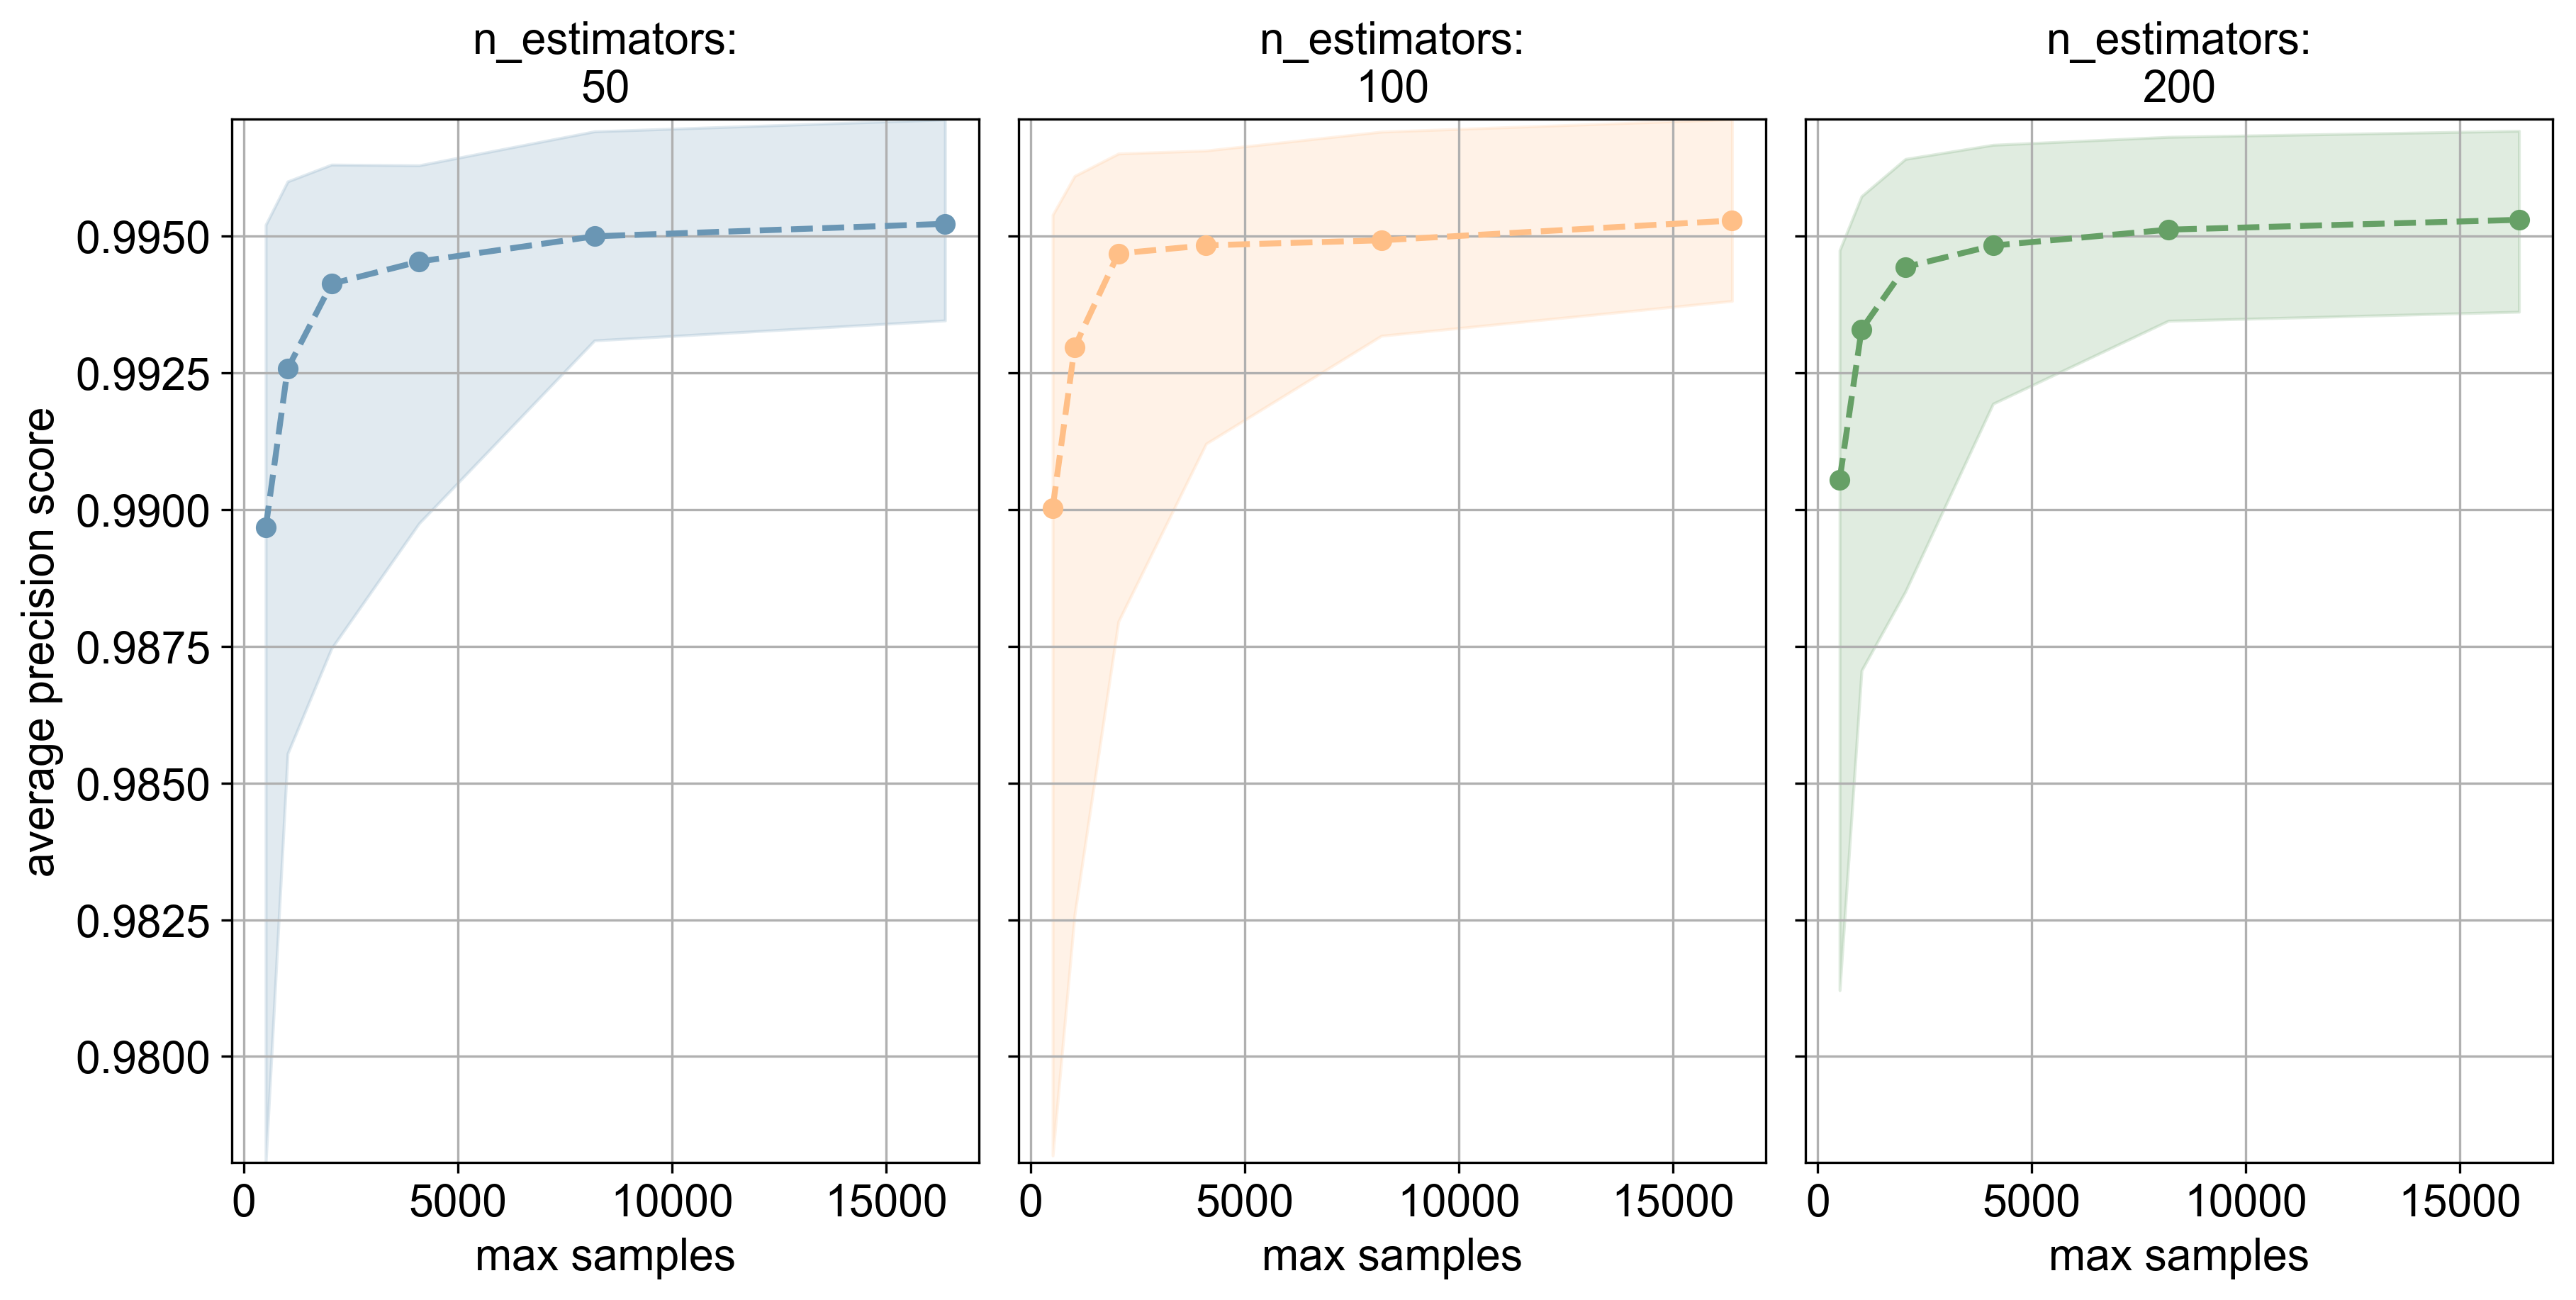

average_precision_score vs "n_estimators" for different "max_samples" values

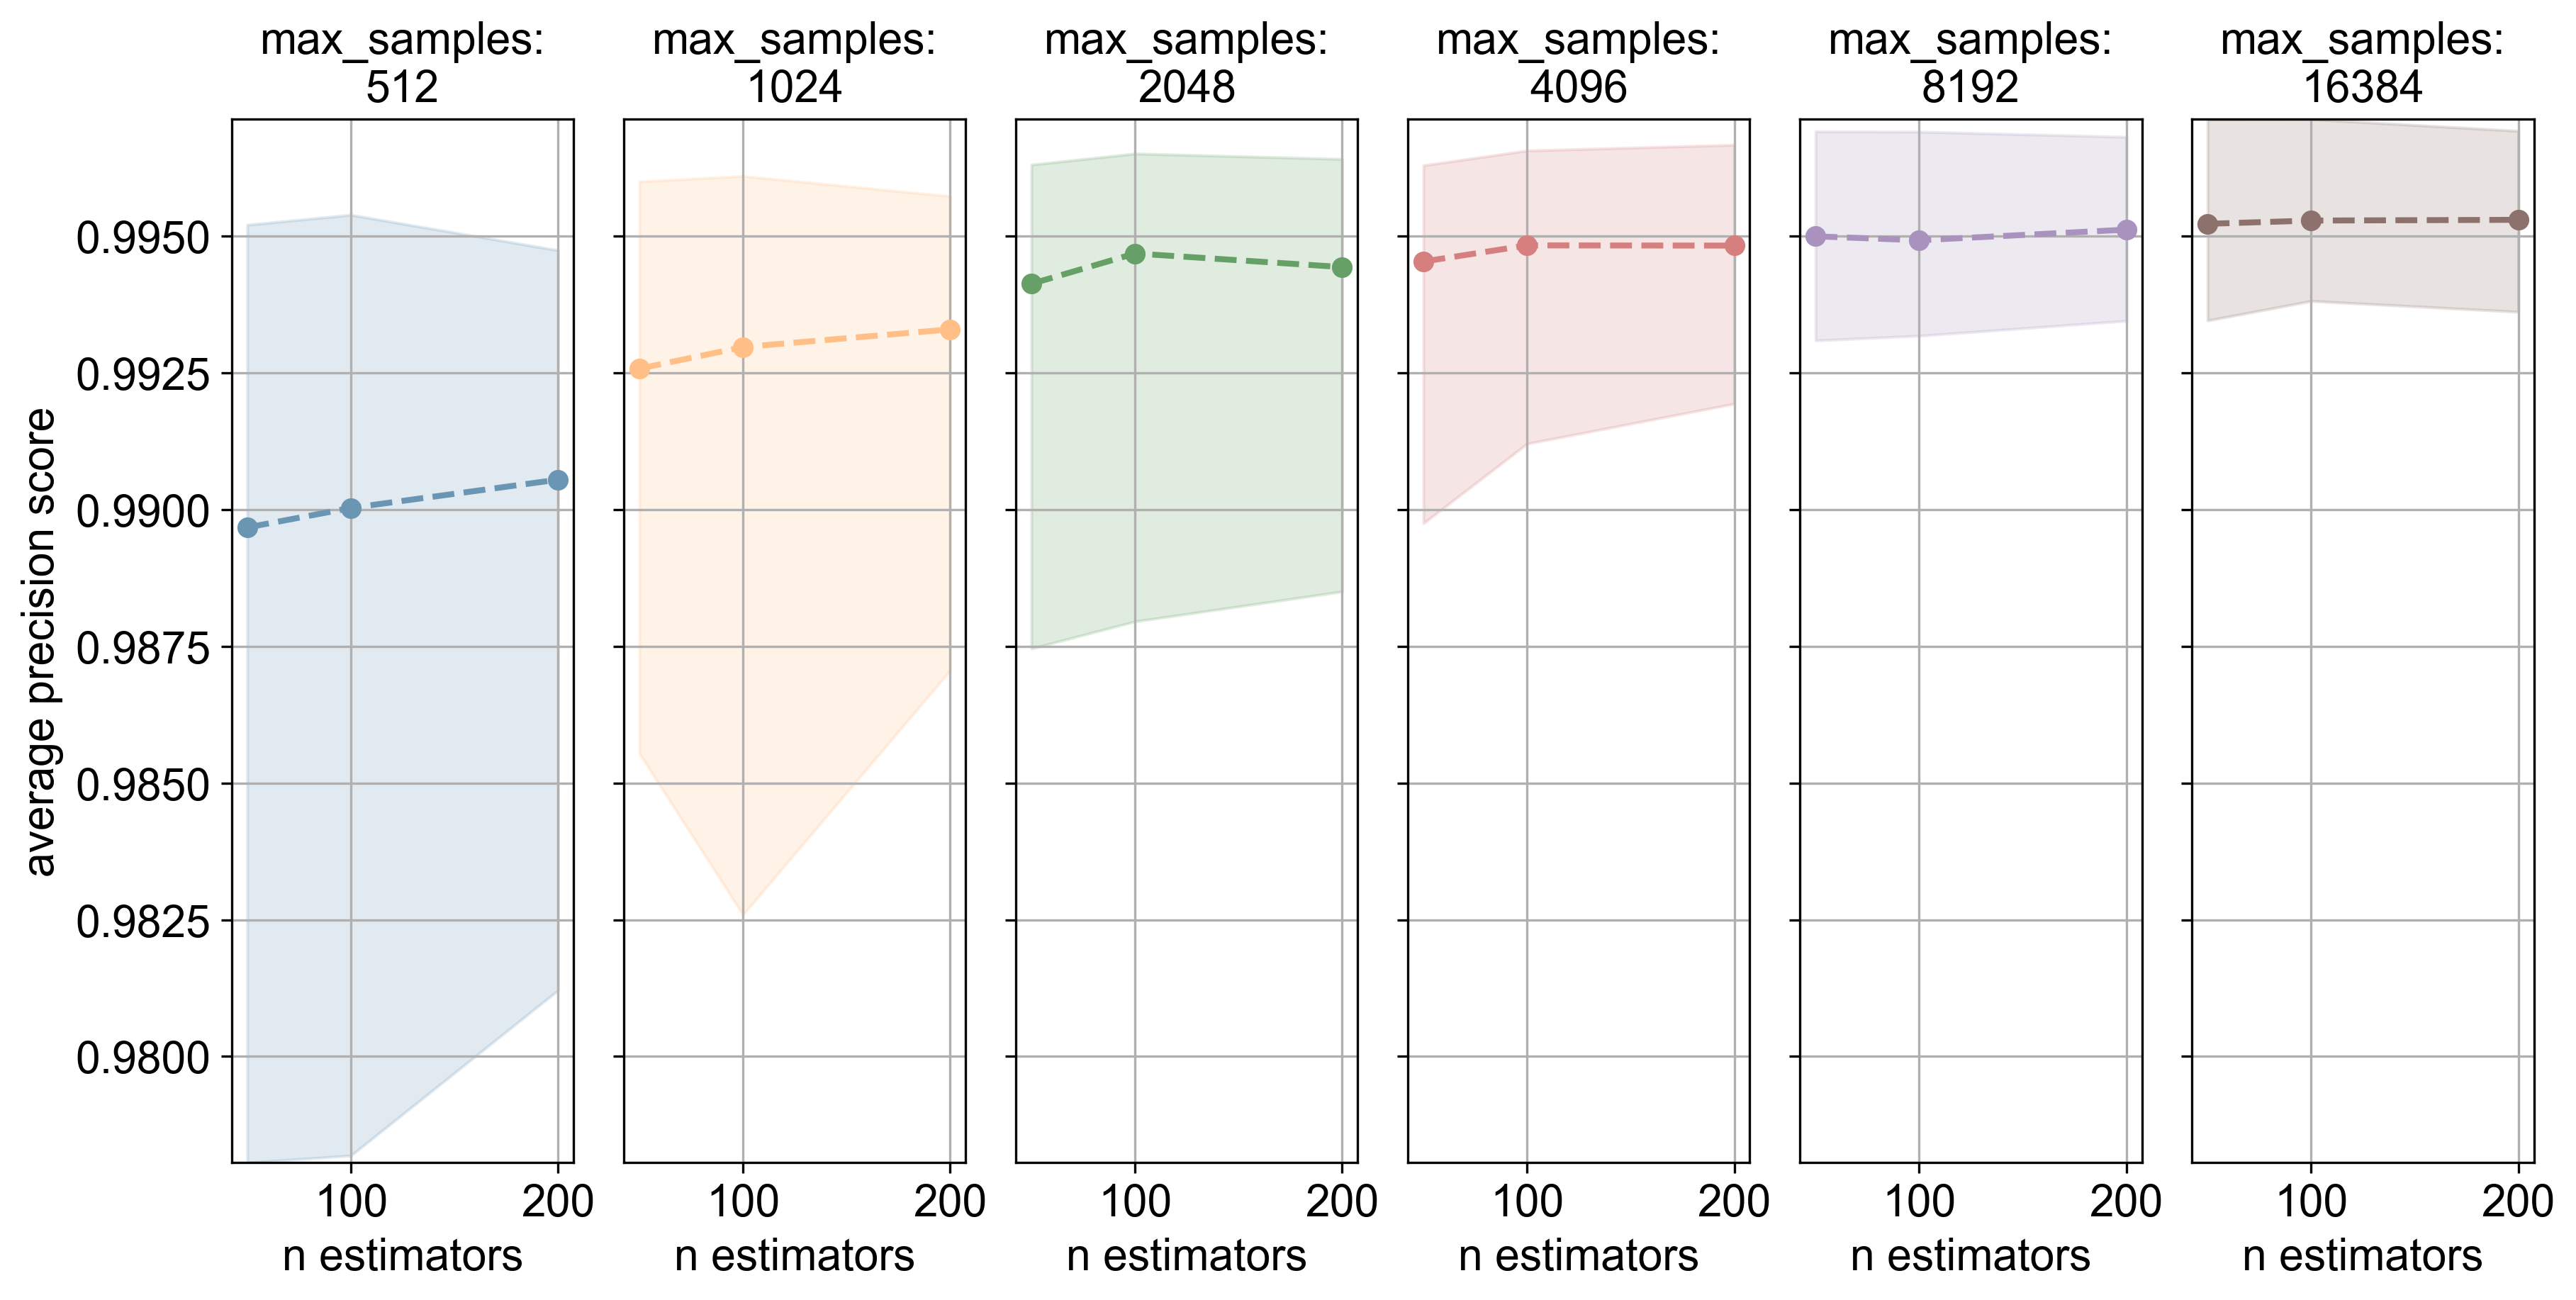

In [7]:
SCORE = 'average_precision_score'

printhtml('<h3>Score used: %s</h4>' % SCORE)
dfmin, dfmedian, dfmax = get_hyperparam_dfs(eval_df, SCORE, n_estimators=n_estimators, max_samples=max_samples)

printhtml('<h4>Min %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmin.round(4))
printhtml('<h4>Median %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmedian.round(4))
printhtml('<h4>Max %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmax.round(4))

printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel=SCORE.replace('_', ' '))
printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel=SCORE.replace('_', ' '))

Score used: roc_auc_score

Min roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9789  0.9868  0.9878  0.9896  0.9920  0.9927
             100      0.9803  0.9839  0.9881  0.9908  0.9921  0.9927
             200      0.9826  0.9879  0.9886  0.9915  0.9922  0.9924

Median roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9908  0.9928  0.9936  0.9939  0.9943  0.9946
             100      0.9909  0.9930  0.9940  0.9940  0.9941  0.9945
             200      0.9914  0.9930  0.9938  0.9942  0.9943  0.9944

Max roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9957  0.9961  0.9962  0.9964  0.9965  0.9970
             100      0.9954  0.9962  0.9964  0.9964  0.9965  0.9970
             200      0.9951  0.9960  0.9964  0.9965  0.9965  0.9965

roc_auc_score vs "max_samples" for diffetent "n_estimators" values

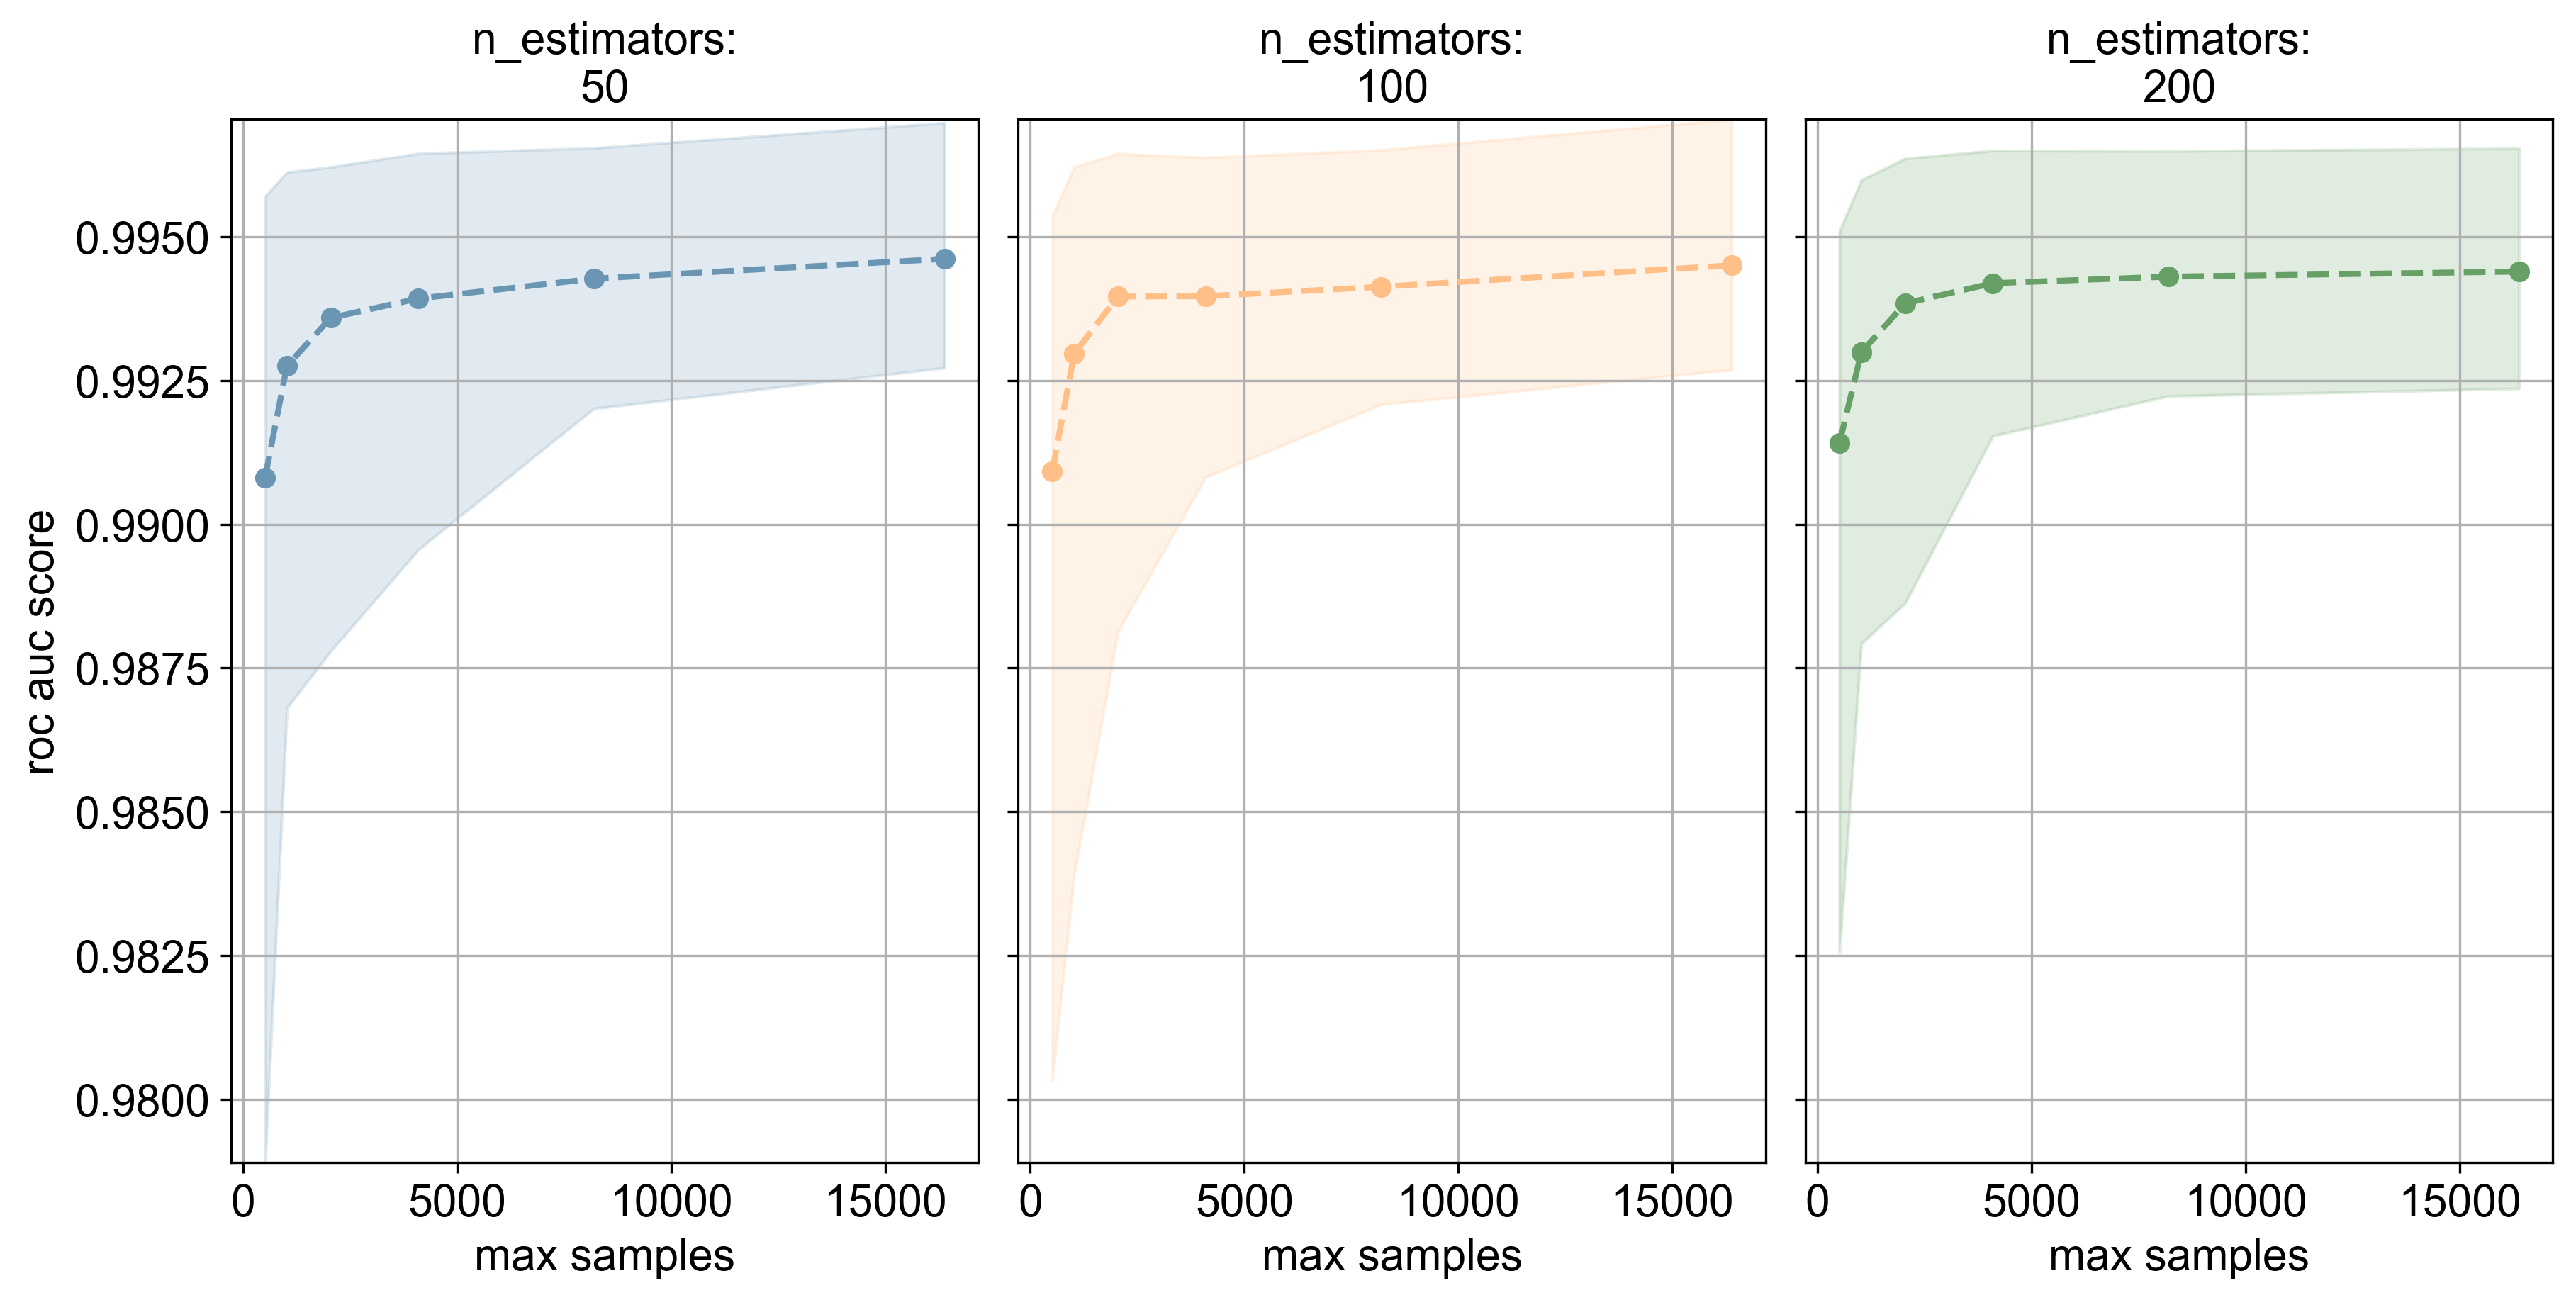

roc_auc_score vs "n_estimators" for different "max_samples" values

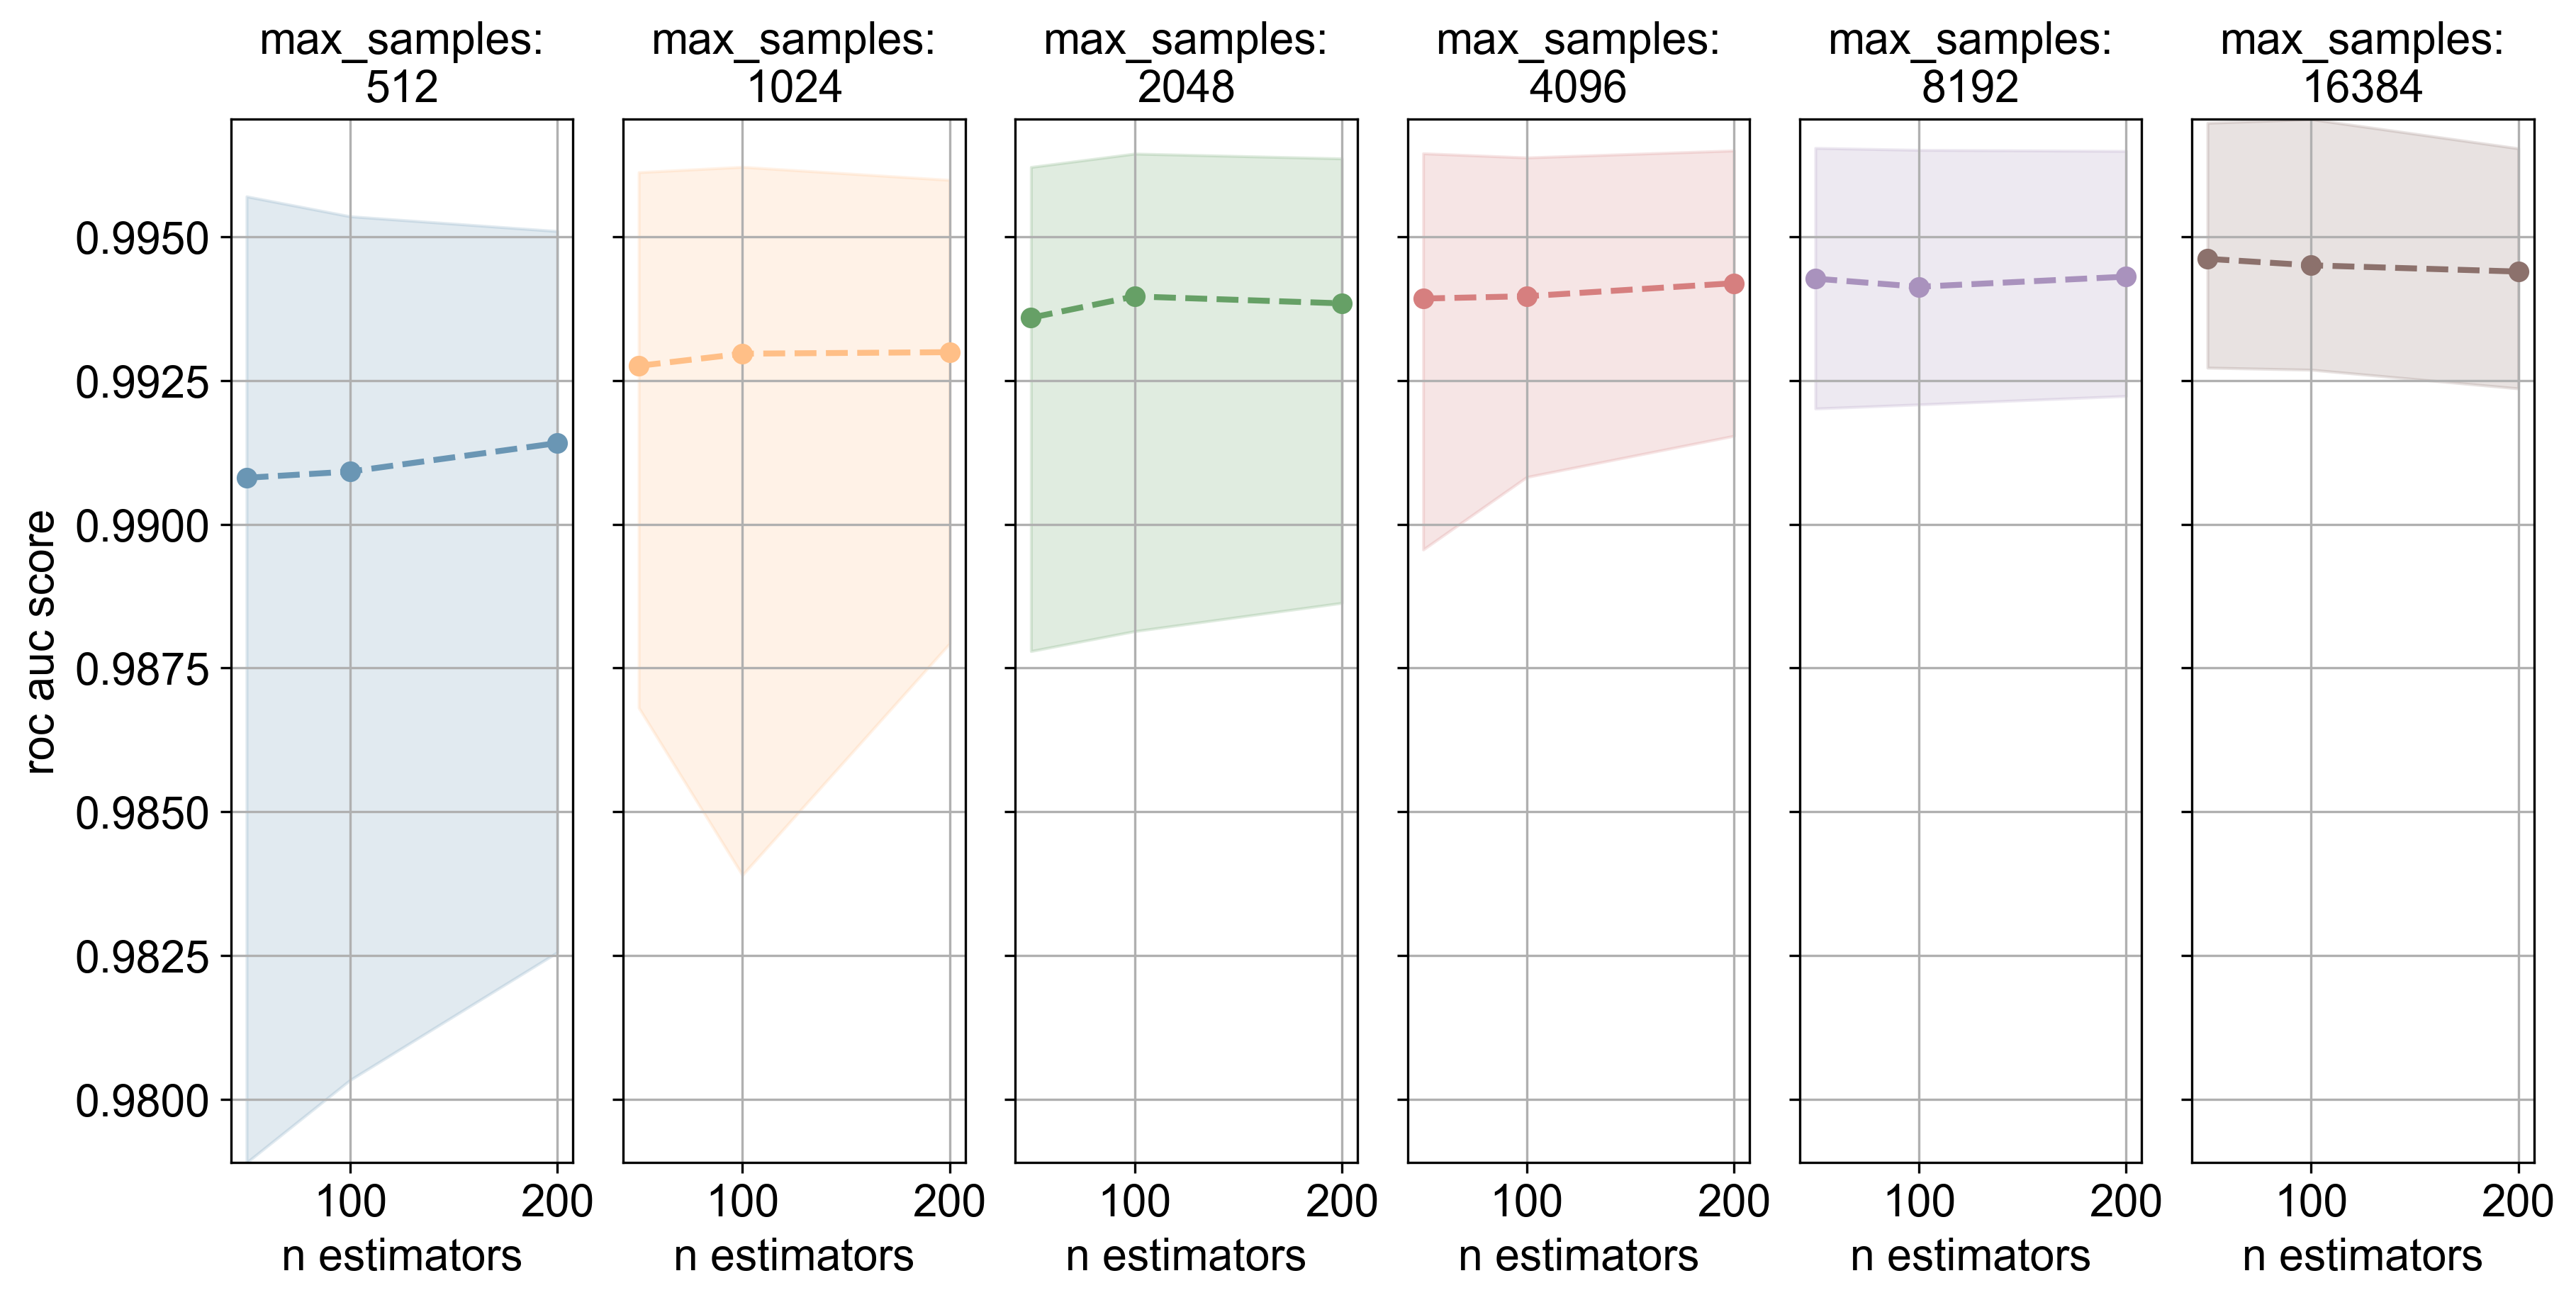

In [8]:
SCORE = 'roc_auc_score'

printhtml('<h3>Score used: %s</h4>' % SCORE)
dfmin, dfmedian, dfmax = get_hyperparam_dfs(eval_df, SCORE, n_estimators=n_estimators, max_samples=max_samples)

printhtml('<h4>Min %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmin.round(4))
printhtml('<h4>Median %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmedian.round(4))
printhtml('<h4>Max %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmax.round(4))

printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel=SCORE.replace('_', ' '))
printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel=SCORE.replace('_', ' '))